In [2]:
import nltk
nltk.download('punkt')  # Download sentence tokenizer
nltk.download('averaged_perceptron_tagger')  # Download POS tagger
from nltk import word_tokenize, pos_tag, FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob  # Sentiment analysis
from collections import Counter  # Counter for trigrams
from wordcloud import WordCloud  # Wordcloud generation
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     /media/mldadmin/home/s123mdg310_03/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /media/mldadmin/home/s123mdg310_03/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
with open("../transcripts/whisperx_transcript002.txt", "r") as f:
    text = f.read()
sentences = nltk.sent_tokenize(text)

In [12]:
# Tokenize sentences into words and filter out stopwords

filtered_tokens = [[word.lower() for word in word_tokenize(sentence) if word.lower() not in stopwords.words('english')] for sentence in sentences]

# Flatten the list of tokens
all_words = [word for sentence_words in filtered_tokens for word in sentence_words]

# Perform part-of-speech tagging
pos_tags = pos_tag(all_words)

# Extract trigrams (collocations)
trigrams = nltk.trigrams(all_words)

# Count frequencies of words
word_freq = FreqDist(all_words)

# Generate word cloud for meaningful words
wordcloud = WordCloud().generate_from_frequencies(word_freq)

In [9]:
from nltk.corpus import wordnet

# Define noun tags based on NLTK's tagset
NOUN_TAGS = ['NN', 'NNS', 'NNP', 'NNPS']  # Common noun tags (singular, plural, proper singular, proper plural)
words = nltk.tokenize.word_tokenize(text)
words = [word.lower() for word in words if word not in stopwords.words('english')]
# Filter most frequent nouns
fdist = nltk.FreqDist(words)
most_freq_nouns = [w for w, c in fdist.most_common(10)
                   if nltk.pos_tag([w])[0][1] in NOUN_TAGS]

In [10]:

print(most_freq_nouns)

['i', 'chuan']


In [16]:
# Number of speakers and names of speakers
speakers = [line.split(":")[0].strip() for line in text.split("\n") if line.strip()]
num_speakers = len(set(speakers))
speaker_names = set(speakers)

# Calculate who spoke the longest, least, and average
speaker_times = Counter(speakers)
longest_speaker = max(speaker_times, key=speaker_times.get)
least_speaker = min(speaker_times, key=speaker_times.get)
average_speaker = sum(speaker_times.values()) / len(speaker_times)


print("Number of speakers:", num_speakers)
print("Speaker names:", speaker_names)
print("Longest speaker:", longest_speaker)
print("Least speaker:", least_speaker)
print("Average speaking time:", average_speaker)

Number of speakers: 216
Speaker names: {'SPEAKER_13  190.792', "been feeling better? He's much better. Every time he comes back, he helps me sleep. I was hoping for a new start. I didn't have any special", 'SPEAKER_12  1313.914', "Chuan Chuan is doing what she can to make space. This double-decker bed was donated by a friend. The place has become very narrow. When I walk here, it will affect my husband's sleep. He will feel uncomfortable. Why is it so messy? Because I want to say something now. To be honest, most of these things are hers. She brought back the things she liked. She didn't want me to mess with her. You have to ask her first. If you don't ask her, she'll say, okay, you can throw it away. But if you don't do that, what will people do? She's unhappy, to", 'SPEAKER_00  372.332', 'SPEAKER_09  1160.524', "I can understand that they need to report to the police, because this is evidence. But sometimes it's not about the body. It's about the mind. It's about the mind. But the pr

Basic Analysis
Total number of words: 3246
1st common trigram: ('ready', '?', 'ready') (Count: 49 ) 2nd common trigram: ('?', 'ready', '?') (Count: 49 )
Positivity Score: 0.26968503937007876
Neutrality Score: 0.5177165354330708
Negativity Score: 0.2125984251968504
Duration Analysis
Spoke the most: What's wrong? ( 2 sec)
Spoke the least: SPEAKER_00  1.192 ( 1 sec)
Visual Analysis
Number of words excluding punctuation & stopwords: 1980


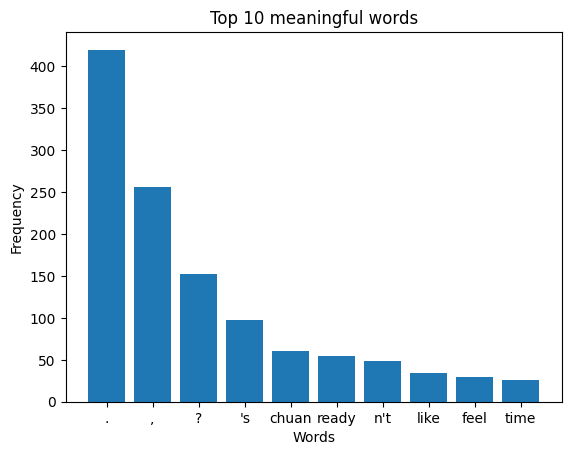

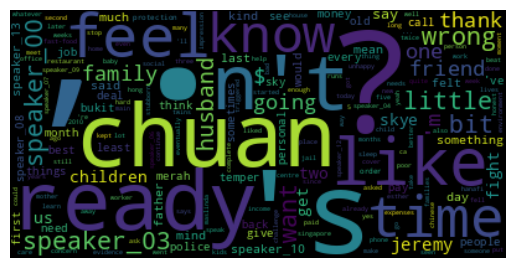

Graph Analysis
Num distinct speakers: 216
Num questions asked: 99
Num answers given: 409
Answered the most questions: Thank you, Jeremy. ( 12 answered)
Pair w/ most back-and-forth: ('it.', 'SPEAKER_07  969.582')


In [17]:
# Basic Analysis
total_words = len(all_words)
print("Basic Analysis")
print("Total number of words:", total_words)

# Common trigrams
trigram_freq = FreqDist(nltk.trigrams(all_words))
common_trigrams = trigram_freq.most_common(2)
print("1st common trigram:", common_trigrams[0][0], "(Count:", common_trigrams[0][1], ")", end=' ')
print("2nd common trigram:", common_trigrams[1][0], "(Count:", common_trigrams[1][1], ")")

# Sentiment Analysis
sentiments = [TextBlob(sentence).sentiment.polarity for sentence in sentences]
positivity_score = sum(1 for sentiment in sentiments if sentiment > 0) / len(sentiments)
negativity_score = sum(1 for sentiment in sentiments if sentiment < 0) / len(sentiments)
neutrality_score = sum(1 for sentiment in sentiments if sentiment == 0) / len(sentiments)
print("Positivity Score:", positivity_score)
print("Neutrality Score:", neutrality_score)
print("Negativity Score:", negativity_score)

# Duration Analysis
most_speaker = max(speaker_times, key=speaker_times.get)
least_speaker = min(speaker_times, key=speaker_times.get)
print("Duration Analysis")
print("Spoke the most:", most_speaker, "(", speaker_times[most_speaker], "sec)")
print("Spoke the least:", least_speaker, "(", speaker_times[least_speaker], "sec)")
# average_times = {speaker: sum(speaker_times[speaker] for speaker in speaker_times if speaker != least_speaker) / (len(speaker_times) - 1) for speaker in speaker_times}
# print("Average speaking times:")
# for speaker, avg_time in average_times.items():
#     print(speaker + ":", round(avg_time, 4), "sec", end=" ")
# print()

# Visual Analysis
print("Visual Analysis")
# Number of words excluding punctuation & stopwords
filtered_words_no_punct = [word for word in all_words if word.isalnum()]
num_words_no_punct = len(filtered_words_no_punct)
print("Number of words excluding punctuation & stopwords:", num_words_no_punct)
# Visual frequency chart of top 10 meaningful words (use matplotlib)
top_words = word_freq.most_common(10)
plt.bar(range(len(top_words)), [freq for word, freq in top_words], align='center')
plt.xticks(range(len(top_words)), [word for word, freq in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 meaningful words')
plt.show()
# Visual word cloud of most meaningful used words
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Graph Analysis
print("Graph Analysis")
num_speakers = len(set(speakers))
print("Num distinct speakers:", num_speakers)
num_questions_asked = sum(1 for sentence in sentences if '?' in sentence)
num_answers_given = sum(1 for sentence in sentences if '?' not in sentence and sentence.strip() != '')
print("Num questions asked:", num_questions_asked)
print("Num answers given:", num_answers_given)
speaker_questions = Counter([line.split(":")[0].strip() for line in sentences if '?' in line])
speaker_answers = Counter([line.split(":")[0].strip() for line in sentences if '?' not in line and line.strip() != ''])
#most_questions_asked = max(speaker_questions, key=speaker_questions.get)
most_answers_given = max(speaker_answers, key=speaker_answers.get)
print("Answered the most questions:", most_answers_given, "(", speaker_answers[most_answers_given], "answered)")
#print("Asked the most questions:", most_questions_asked, "(", speaker_questions[most_questions_asked], "asked)")

# Pair with most back-and-forth
speaker_dialogues = {}
for speaker, line in zip(speakers, sentences):
    if speaker in speaker_dialogues:
        speaker_dialogues[speaker].append(line)
    else:
        speaker_dialogues[speaker] = [line]
back_and_forth = [(speaker1, speaker2) for speaker1 in speaker_dialogues for speaker2 in speaker_dialogues if speaker1 != speaker2 and len(speaker_dialogues[speaker1]) == len(speaker_dialogues[speaker2])]
pair_with_most_back_and_forth = max(set(back_and_forth), key=back_and_forth.count)
print("Pair w/ most back-and-forth:", pair_with_most_back_and_forth)


In [8]:
tokens = word_tokenize(text)

# Remove punctuations
all_words = [word.lower() for word in tokens if word.isalnum()]

# Common trigrams
trigram_freq = FreqDist(nltk.trigrams(all_words))
common_trigrams = trigram_freq.most_common(5)
print("1st common trigram:", common_trigrams[0][0], "(Count:", common_trigrams[0][1], ")", end=' ')
print("2nd common trigram:", common_trigrams[1][0], "(Count:", common_trigrams[1][1], ")")

1st common trigram: ('are', 'you', 'ready') (Count: 52 ) 2nd common trigram: ('ready', 'are', 'you') (Count: 52 )


In [25]:
from langchain.output_parsers import ResponseSchema, StructuredOutputParser
from langchain.prompts import ChatPromptTemplate
from langchain.llms import OpenAI
import os

with open(r'../keys/archive_note.txt', 'r') as fp:
    # read all lines using readline()
    lines = fp.readlines()
    for line in lines:
        os.environ['OPENAI_API_KEY'] = line

def load_transcript():
    with open("../transcripts/whisperx_transcript002.txt") as f:
        transcript_str = f.read()
    return (transcript_str)

def meeting_info(transcript_str):
    meeting_date = ResponseSchema(
            name="meeting_date",
            description="date of the meeting stored in datetime format DD/MM/YYYY.",
        )
    attendees_list = ResponseSchema(
            name="attendees_list",
            description="Full name of everyone present in the text, each stored as a string in the list.",
        )

    start_time = ResponseSchema(
            name="start_time",
            description="time the meeting started in 24 hour HH:mm format in datetime",
        )

    end_time = ResponseSchema(
            name="end_time",
            description="time the meeting ended in 24 hour HH:mm format in datetime",
        )

    output_parser = StructuredOutputParser.from_response_schemas(
        [attendees_list]
    )

    response_format = output_parser.get_format_instructions()

    prompt = ChatPromptTemplate.from_template("You are a helpful formatting assistant. Return the attendees_list.        '''{meeting_info}''' \n {format_instructions}")

    llm_openai = OpenAI()
    formated_prompt = prompt.format(**{"meeting_info":transcript_str, "format_instructions":output_parser.get_format_instructions()})
    response_openai = llm_openai(formated_prompt)
    print(response_openai)
    print('printing response')
    meeting_info_dict = output_parser.parse(response_openai)
    return(meeting_info_dict)

In [26]:
transcript_str = load_transcript()
meeting_info(transcript_str)
print(meeting_info_dict)

InvalidRequestError: The model `text-davinci-003` has been deprecated, learn more here: https://platform.openai.com/docs/deprecations

In [29]:
from jsonformer import Jsonformer
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained("aisingapore/sea-lion-3b")
tokenizer = AutoTokenizer.from_pretrained("aisingapore/sea-lion-3b")

json_schema = {
    "type": "object",
    "properties": {
        "name": {"type": "string"},
        "age": {"type": "number"},
        "is_student": {"type": "boolean"},
        "courses": {
            "type": "array",
            "items": {"type": "string"}
        }
    }
}

prompt = "Generate a person's information based on the following schema:"
jsonformer = Jsonformer(model, tokenizer, json_schema, prompt)
generated_data = jsonformer()

config.json: 100%|██████████| 1.27k/1.27k [00:00<00:00, 7.12MB/s]
model.safetensors: 100%|██████████| 6.36G/6.36G [11:12<00:00, 9.46MB/s]
generation_config.json: 100%|██████████| 91.0/91.0 [00:00<00:00, 440kB/s]
tokenizer_config.json: 100%|██████████| 795/795 [00:00<00:00, 4.15MB/s]
tokenization_SEA_BPE.py: 100%|██████████| 7.79k/7.79k [00:00<00:00, 20.5MB/s]
A new version of the following files was downloaded from https://huggingface.co/aisingapore/sea-lion-3b:
- tokenization_SEA_BPE.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
tokenizer.model: 100%|██████████| 4.57M/4.57M [00:00<00:00, 7.21MB/s]
special_tokens_map.json: 100%|██████████| 59.0/59.0 [00:00<00:00, 381kB/s]
2024-03-19 20:08:42.487244: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following i

In [30]:
generated_data

{'name': '辞辞辞辞辞辞辞辞辞辞',
 'age': 2.0192019201920193e+23,
 'is_student': True,
 'courses': ['辞辞辞辞辞辞辞辞辞辞']}

In [32]:
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("aisingapore/sea-lion-7b-instruct-research", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("aisingapore/sea-lion-7b-instruct-research", trust_remote_code=True)

prompt_template = "### USER:\n{human_prompt}\n\n### RESPONSE:\n"
prompt = """Apa sentimen dari kalimat berikut ini?
Kalimat: Buku ini sangat membosankan.
Jawaban: """
full_prompt = prompt_template.format(human_prompt=prompt)

tokens = tokenizer(full_prompt, return_tensors="pt")
output = model.generate(tokens["input_ids"], max_new_tokens=20, eos_token_id=tokenizer.eos_token_id)
print(tokenizer.decode(output[0], skip_special_tokens=True))

tokenizer_config.json: 100%|██████████| 813/813 [00:00<00:00, 4.40MB/s]
tokenization_SEA_BPE.py: 100%|██████████| 7.39k/7.39k [00:00<00:00, 23.4MB/s]
A new version of the following files was downloaded from https://huggingface.co/aisingapore/sea-lion-7b-instruct-research:
- tokenization_SEA_BPE.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
tokenizer.model: 100%|██████████| 4.57M/4.57M [00:00<00:00, 9.46MB/s]
special_tokens_map.json: 100%|██████████| 287/287 [00:00<00:00, 837kB/s]
config.json: 100%|██████████| 1.39k/1.39k [00:00<00:00, 8.38MB/s]
configuration_mpt.py: 100%|██████████| 11.0k/11.0k [00:00<00:00, 38.8MB/s]
A new version of the following files was downloaded from https://huggingface.co/aisingapore/sea-lion-7b-instruct-research:
- configuration_mpt.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code f

### USER:
Apa sentimen dari kalimat berikut ini?
Kalimat: Buku ini sangat membosankan.
Jawaban: 

### RESPONSE:
Negatif


In [33]:
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("feeltheAGI/Maverick-Math-7B", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("feeltheAGI/Maverick-Math-7B", trust_remote_code=True)

prompt_template = "### USER:\n{human_prompt}\n\n### RESPONSE:\n"
prompt = """If today is 14 Jan 2024, what is the date 2 weeks from now """
full_prompt = prompt_template.format(human_prompt=prompt)

tokens = tokenizer(full_prompt, return_tensors="pt")
output = model.generate(tokens["input_ids"], max_new_tokens=20, eos_token_id=tokenizer.eos_token_id)
print(tokenizer.decode(output[0], skip_special_tokens=True))



tokenizer_config.json: 100%|██████████| 1.05k/1.05k [00:00<00:00, 5.71MB/s]
tokenizer.model: 100%|██████████| 493k/493k [00:00<00:00, 2.50MB/s]
config.json: 100%|██████████| 645/645 [00:00<00:00, 3.92MB/s]
pytorch_model.bin.index.json: 100%|██████████| 23.9k/23.9k [00:00<00:00, 11.9MB/s]
pytorch_model-00001-of-00003.bin: 100%|██████████| 4.94G/4.94G [08:43<00:00, 9.45MB/s]
pytorch_model-00002-of-00003.bin: 100%|██████████| 5.00G/5.00G [08:48<00:00, 9.46MB/s]
pytorch_model-00003-of-00003.bin: 100%|██████████| 4.54G/4.54G [08:00<00:00, 9.45MB/s]
generation_config.json: 100%|██████████| 132/132 [00:00<00:00, 738kB/s]
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


### USER:
If today is 14 Jan 2024, what is the date 2 weeks from now 

### RESPONSE:
To calculate the date that is 2 weeks from today (14 Jan 2024
